<a href="https://colab.research.google.com/github/suhasholla3/Data-Science-Projects/blob/master/MovieRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MOVIE RECOMMENDER SYSTEM USING COLLABARATIVE ITEM BASED FILTERING

##What is collaborative Filtering ?
###Collaborative Filtering simply put uses the "wisdom of the crowd" to recommend items. Item based collaborative filtering uses the patterns of users who liked the same movie as me to recommend me a movie (users who liked the movie that I like, also liked these other movies). Recommendation based on user's input of any movie present in the dataset is done.

RATINGS FILE DESCRIPTION
All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

UserIDs range between 1 and 6040

MovieIDs range between 1 and 3952

Ratings are made on a 5-star scale (whole-star ratings only)

Timestamp is represented in seconds since the epoch as returned by time(2)
Each user has at least 20 ratings 


USERS FILE DESCRIPTION
User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided some demographic information are included in this data set.

Gender is denoted by a "M" for male and "F" for female

Age is chosen from the following ranges:

1: "Under 18"

18: "18-24"

25: "25-34"

35: "35-44"

45: "45-49"

50: "50-55"

56: "56+"

Occupation is chosen from the following choices:

0: "other" or not specified

1: "academic/educator"

2: "artist"

3: "clerical/admin"

4: "college/grad student"

5: "customer service"

6: "doctor/health care"

7: "executive/managerial"

8: "farmer"

9: "homemaker"

10: "K-12 student"

11: "lawyer"

12: "programmer"

13: "retired"

14: "sales/marketing"

15: "scientist"

16: "self-employed"

17: "technician/engineer"

18: "tradesman/craftsman"

19: "unemployed"

20: "writer"

MOVIES FILE DESCRIPTION
Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)
Genres are pipe-separated and are selected from the following genres:

Action

Adventure

Animation

Children's

Comedy

Crime

Documentary

Drama

Fantasy

Film-Noir

Horror

Musical

Mystery

Romance

Sci-Fi

Thriller

War

Western

Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries

Movies are mostly entered by hand, so errors and inconsistencies may exist

## LET'S START BUILDING YAYY !!!

In [0]:
#IMPORTING THE NECESSARIES
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##Reading required data (movie file)


In [2]:
#movie data
ratings_cols = ['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', encoding='latin-1',names=ratings_cols)
print ('Shape of ratings:{}'.format(ratings.shape))
ratings = ratings.drop('Timestamp',axis=1)
ratings.head()

Shape of ratings:(1000209, 4)


,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [3]:
#users data
users_cols = ['UserID','Gender','Age','Occupation','Zip_code']
users = pd.read_csv('users.dat', sep='::', encoding='latin-1',names=users_cols)
print ('Shape of users:{}'.format(users.shape))
users.head()


Shape of users:(6040, 5)


,UserID,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:

users['Gender'].replace({'F':0,'M':1},inplace=True)
users['Age'].replace({1: "Under 18",18: "18-24",25: "25-34",35: "35-44",45: "45-49",50: "50-55",56: "56+"},inplace=True)
users['Occupation'].replace({0: "other or not specified",1: "academic/educator",2: "artist",\
                             3: "clerical/admin",4: "college/grad student",5: "customer service",\
                             6: "doctor/health care",7: "executive/managerial",8: "farmer",\
                             9: "homemaker",10: "K-12 student",11: "lawyer",12: "programmer",\
                             13: "retired",14: "sales/marketing",15: "scientist",16: "self-employed",\
                             17: "technician/engineer",18: "tradesman/craftsman",19: "unemployed",20: "writer"},inplace=True)
users.head()

,UserID,Gender,Age,Occupation,Zip_code
0,1,0,Under 18,K-12 student,48067
1,2,1,56+,self-employed,70072
2,3,1,25-34,scientist,55117
3,4,1,45-49,executive/managerial,02460
4,5,1,25-34,writer,55455


In [5]:
movies_cols = ['MovieID','Title','Genres']
movies = pd.read_csv('movies.dat',sep='::',names=movies_cols)
print ('Shape of movies:{}'.format(movies.shape))
movies.head()

Shape of movies:(3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## LETS DIVE INTO EXPLORATORY DATA ANALYSIS

####VISUALISING MOST COMMON WORDS IN MOVIE TITLE BY WORLD CLOUD

Toy Story (1995) Jumanji (1995) Grumpier Old Men (1995) Waiting to Exhale (1995) Father of the Bride Part II (1995) Heat (1995) Sabrina (1995) Tom and Huck (1995) Sudden Death (1995) GoldenEye (1995) American President, The (1995) Dracula: Dead and Loving It (1995) Balto (1995) Nixon (1995) Cutthroat Island (1995) Casino (1995) Sense and Sensibility (1995) Four Rooms (1995) Ace Ventura: When Nature Calls (1995) Money Train (1995) Get Shorty (1995) Copycat (1995) Assassins (1995) Powder (1995) Leaving Las Vegas (1995) Othello (1995) Now and Then (1995) Persuasion (1995) City of Lost Children, The (1995) Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Dangerous Minds (1995) Twelve Monkeys (1995) Wings of Courage (1995) Babe (1995) Carrington (1995) Dead Man Walking (1995) Across the Sea of Time (1995) It Takes Two (1995) Clueless (1995) Cry, the Beloved Country (1995) Richard III (1995) Dead Presidents (1995) Restoration (1995) Mortal Kombat (1995) To Die For (1995) How to Make an A

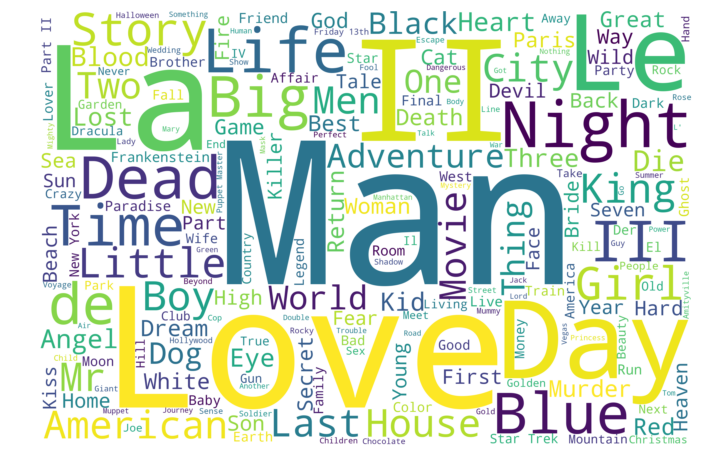

In [7]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['Title'] = movies['Title'].fillna("").astype('str')
title_corpus = ' '.join(movies['Title'])
print(title_corpus)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=3000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off');

Movie names with words like Day, Love, Life, Night, Man, Dead etc are among the most commonly occuring words.

###Histogram on rating of movies from rating dataframe

Text(0, 0.5, 'Number of movies')

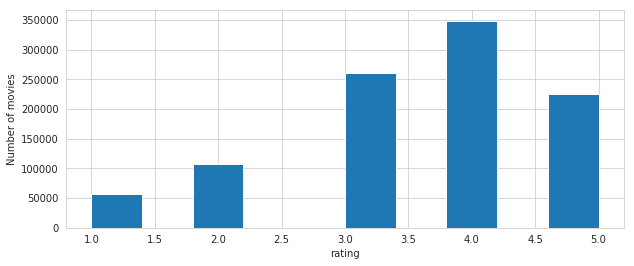

In [9]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=10);
plt.xlabel('rating')
plt.ylabel('Number of movies')

###Lets now mergerating column with the movie dataframe to form a new dataframe

In [10]:
df = pd.merge(ratings,movies,on='MovieID')
df.head()

,UserID,MovieID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:
df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [12]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [13]:
grading = pd.DataFrame(df.groupby('Title')['Rating'].mean())
grading.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [14]:
grading['num of ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
grading.head()

,Rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


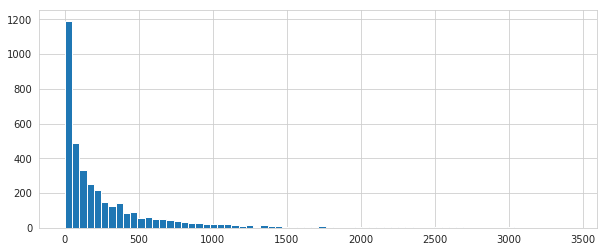

In [15]:
plt.figure(figsize=(10,4))
grading['num of ratings'].hist(bins=70);

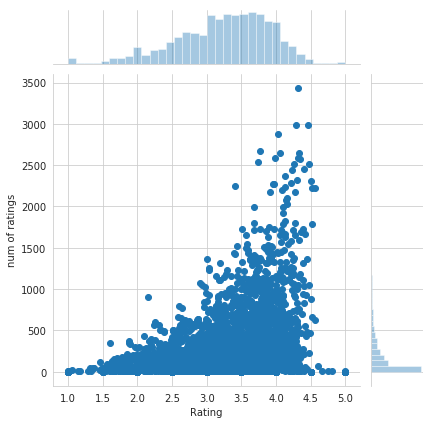

In [16]:
sns.jointplot(x='Rating',y='num of ratings',data=grading);

##CONTENT BASED FILTERING

In [0]:
# Break up the big genre string into a string array
movies['Genres'] = movies['Genres'].str.split('|')
# Convert genres to string value
movies['Genres'] = movies['Genres'].fillna("").astype('str')

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['Genres'])
tfidf_matrix.shape

(3883, 303)

In [0]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
# Build a 1-dimensional array with movie titles
titles = movies['Title']
indices = pd.Series(movies.index, index=movies['Title'])
# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [31]:
genre_recommendations('Jumanji (1995)')

55          Kids of the Round Table (1995)
59      Indian in the Cupboard, The (1995)
124      NeverEnding Story III, The (1994)
996        Escape to Witch Mountain (1975)
1898                      Labyrinth (1986)
Name: Title, dtype: object

##Collaborative Filtering

In [0]:
# Fill NaN values in user_id and movie_id column with 0
ratings['UserID'] = ratings['UserID'].fillna(0)
ratings['MovieID'] = ratings['MovieID'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['Rating'] = ratings['Rating'].fillna(ratings['Rating'].mean())

In [33]:

# Randomly sample 5% of the ratings dataset
sample_subset = ratings.sample(frac=0.02)
# Check the sample info
print(sample_subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 931201 to 771400
Data columns (total 3 columns):
UserID     20004 non-null int64
MovieID    20004 non-null int64
Rating     20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [0]:
#creating training and test data by the sample
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sample_subset, test_size=0.2)

In [42]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data.as_matrix(columns = ['UserID', 'MovieID', 'Rating'])
test_data_matrix = test_data.as_matrix(columns = ['UserID', 'MovieID', 'Rating'])

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


In [0]:
from sklearn.metrics.pairwise import pairwise_distances
# User Similarity Matrix
user_similarity = 1 - pairwise_distances(train_data, metric='cosine')
user_similarity[np.isnan(user_similarity)] = 0

In [0]:
# Item Similarity Matrix
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric='cosine')
item_similarity[np.isnan(item_similarity)] = 0

In [0]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [0]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

In [48]:
item_prediction

array([[2940.52207401, 2744.6427285 , 2612.31827397],
       [2226.55601734, 2018.68983896, 1953.05635815],
       [1384.06492237, 1465.86858657, 1303.24947195],
       ...,
       [2103.06978851, 1953.0419868 , 1863.98621874],
       [2557.07726332, 2093.44664504, 2147.84350733],
       [1125.88665196,  947.55472381,  956.70259507]])

In [49]:
user_prediction

array([[4257.82557648, 2982.62777256, 1131.54665096],
       [3590.25949905, 2243.492984  ,  418.24751695],
       [2679.66832469, 1745.20642494, -228.87474963],
       ...,
       [3465.0493019 , 2177.23977894,  330.71091915],
       [3916.79975817, 2337.19791116,  596.00233067],
       [2618.56927395, 1099.18103512, -663.75030907]])

#FINAL STEP _ EVALUATION

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [55]:
# RMSE on the train data
print('User-based Collaborative Filtering RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based Collaborativw Filterning RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based Collaborative Filtering RMSE: 850.3944364560072
Item-based Collaborativw Filterning RMSE: 1461.256560363968


In [56]:
# RMSE on the test data
print('User-based Collaborative Filtering RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based Collobarative Filtering RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based Collaborative Filtering RMSE: 1367.8837458013581
Item-based Collobarative Filtering RMSE: 1795.8638941059194


##Thus by observation, Item Based Collaborative Filtering yield high similarity score and a higher rmse